In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score,mean_squared_error

from math import sqrt

import seaborn as sns

In [2]:
train =  pd.read_csv('train.csv',delimiter = ',')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train['Outlet_Establishment_Year'].unique().max()

train['Outlet_Establishment_Year'].unique().min()

1985

In [8]:
## Calculating Outlet Age 


train['Outlet_Age'] =  2019 - train['Outlet_Establishment_Year']

print(train['Outlet_Age'])


## Adding the outlet age column to the DatSet
train.head()

0       20
1       10
2       20
3       21
4       32
        ..
8518    32
8519    17
8520    15
8521    10
8522    22
Name: Outlet_Age, Length: 8523, dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32


In [9]:
## Checking unique values in outlet_size
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
train.describe()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [11]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
train['Outlet_Size'].isnull().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [14]:
train['Outlet_Size'] = train['Outlet_Size'].fillna("Medium")

In [15]:
train['Outlet_Size'].isnull().value_counts()

False    8523
Name: Outlet_Size, dtype: int64

In [16]:
train['Item_Weight'].isnull().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [17]:
train['Item_Weight'].mean()

12.857645184136183

In [18]:
train['Item_Weight'] =  train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [19]:
train['Item_Weight'].isnull().any()

False

<AxesSubplot:>

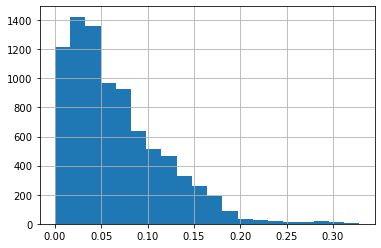

In [20]:
train['Item_Visibility'].hist(bins =20)

<AxesSubplot:xlabel='Item_Visibility'>

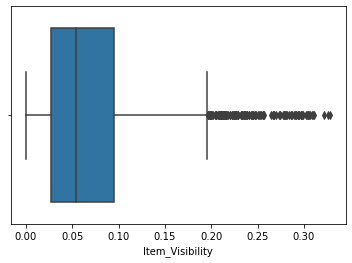

In [21]:
sns.boxplot(x = train['Item_Visibility'])

what is outlier -- 
A data point is an outlier if it is more than 1.5 IQR above the third Quartile or bwlow the first Quartile.

In [22]:
Q1 =  train['Item_Visibility'].quantile(0.25)
Q3 =  train['Item_Visibility'].quantile(0.75)

In [23]:
IQR =  Q3 - Q1
print(IQR)

0.067595815


In [24]:
filt_train =  train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5*@IQR)')

In [25]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,32
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,17
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,15
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,10


In [26]:
filt_train.shape

(8379, 13)

In [27]:
train.shape

train =  filt_train

In [28]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8379 non-null   object 
 1   Item_Weight                8379 non-null   float64
 2   Item_Fat_Content           8379 non-null   object 
 3   Item_Visibility            8379 non-null   float64
 4   Item_Type                  8379 non-null   object 
 5   Item_MRP                   8379 non-null   float64
 6   Outlet_Identifier          8379 non-null   object 
 7   Outlet_Establishment_Year  8379 non-null   int64  
 8   Outlet_Size                8379 non-null   object 
 9   Outlet_Location_Type       8379 non-null   object 
 10  Outlet_Type                8379 non-null   object 
 11  Item_Outlet_Sales          8379 non-null   float64
 12  Outlet_Age                 8379 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [29]:
train['Item_Visibility_bins']  =  pd.cut(train['Item_Visibility'],[0.000,0.005,0.13,0.2],labels = ['Low Viz','Viz','High Viz'])

In [30]:
train['Item_Visibility_bins'].isnull().value_counts()

False    7853
True      526
Name: Item_Visibility_bins, dtype: int64

In [31]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna("Low Viz")

In [32]:
train['Item_Visibility_bins'].isnull().any()

False

In [33]:
train['Item_Fat_Content'] =  train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

train['Item_Fat_Content'] =  train['Item_Fat_Content'].replace(['reg'],'Regular')


In [34]:
train['Item_Fat_Content'].value_counts()


Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [35]:
le = LabelEncoder()

train['Item_Fat_Content'].value_counts()
train['Item_Visibility_bins'].value_counts()
train['Outlet_Location_Type'].value_counts()

train['Outlet_Location_Type'].isnull().value_counts()

False    8379
Name: Outlet_Location_Type, dtype: int64

In [36]:
train['Outlet_Location_Type'].value_counts() 

Tier 3    3283
Tier 2    2785
Tier 1    2311
Name: Outlet_Location_Type, dtype: int64

In [37]:
## Now using label encoding 

train['Item_Fat_Content'] =  le.fit_transform(train['Item_Fat_Content'])
train['Item_Visibility_bins'] =  le.fit_transform(train['Item_Visibility_bins'])
train['Outlet_Location_Type'] =  le.fit_transform(train['Outlet_Location_Type'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8379 non-null   object 
 1   Item_Weight                8379 non-null   float64
 2   Item_Fat_Content           8379 non-null   int32  
 3   Item_Visibility            8379 non-null   float64
 4   Item_Type                  8379 non-null   object 
 5   Item_MRP                   8379 non-null   float64
 6   Outlet_Identifier          8379 non-null   object 
 7   Outlet_Establishment_Year  8379 non-null   int64  
 8   Outlet_Size                8379 non-null   object 
 9   Outlet_Location_Type       8379 non-null   int32  
 10  Outlet_Type                8379 non-null   object 
 11  Item_Outlet_Sales          8379 non-null   float64
 12  Outlet_Age                 8379 non-null   int64  
 13  Item_Visibility_bins       8379 non-null   int32

In [38]:
dummy = pd.get_dummies(train['Outlet_Type'])

dummy.head()


,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [39]:
## Now merging bot train and Test Data  , beow is the new train data 


train = pd.concat([train,dummy],axis = 1)

In [40]:
train.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
Outlet_Age                   False
Item_Visibility_bins         False
Grocery Store                False
Supermarket Type1            False
Supermarket Type2            False
Supermarket Type3            False
dtype: bool

In [41]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Type'],axis =1)

In [42]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Outlet_Age',
       'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [43]:
## Finding Correlation in between variables in between indipendent variables 
train_corr =  train.corr()

<AxesSubplot:>

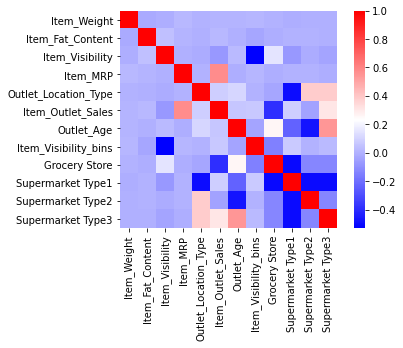

In [44]:
## PLotting Heat map for correlation  
sns.heatmap(data = train_corr,square =  True,cmap = 'bwr' )

In [45]:
X = train.drop('Item_Outlet_Sales',axis =1)
Y = pd.DataFrame(train.Item_Outlet_Sales)

In [58]:
X.head

<bound method NDFrame.head of       Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0           9.300                 0         0.016047  249.8092   
1           5.920                 1         0.019278   48.2692   
2          17.500                 0         0.016760  141.6180   
3          19.200                 1         0.000000  182.0950   
4           8.930                 0         0.000000   53.8614   
...           ...               ...              ...       ...   
8518        6.865                 0         0.056783  214.5218   
8519        8.380                 1         0.046982  108.1570   
8520       10.600                 0         0.035186   85.1224   
8521        7.210                 1         0.145221  103.1332   
8522       14.800                 0         0.044878   75.4670   

      Outlet_Location_Type  Outlet_Age  Item_Visibility_bins  Grocery Store  \
0                        0          20                     2              0   
1                  

In [57]:
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [46]:
X.columns
Y.columns

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8379 non-null   float64
 1   Item_Fat_Content      8379 non-null   int32  
 2   Item_Visibility       8379 non-null   float64
 3   Item_MRP              8379 non-null   float64
 4   Outlet_Location_Type  8379 non-null   int32  
 5   Outlet_Age            8379 non-null   int64  
 6   Item_Visibility_bins  8379 non-null   int32  
 7   Grocery Store         8379 non-null   uint8  
 8   Supermarket Type1     8379 non-null   uint8  
 9   Supermarket Type2     8379 non-null   uint8  
 10  Supermarket Type3     8379 non-null   uint8  
dtypes: float64(3), int32(3), int64(1), uint8(4)
memory usage: 458.2 KB


In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3)
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 4178 to 8022
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5865 non-null   float64
 1   Item_Fat_Content      5865 non-null   int32  
 2   Item_Visibility       5865 non-null   float64
 3   Item_MRP              5865 non-null   float64
 4   Outlet_Location_Type  5865 non-null   int32  
 5   Outlet_Age            5865 non-null   int64  
 6   Item_Visibility_bins  5865 non-null   int32  
 7   Grocery Store         5865 non-null   uint8  
 8   Supermarket Type1     5865 non-null   uint8  
 9   Supermarket Type2     5865 non-null   uint8  
 10  Supermarket Type3     5865 non-null   uint8  
dtypes: float64(3), int32(3), int64(1), uint8(4)
memory usage: 320.7 KB


In [48]:
### Creating  Regression model witn test Data 
## Model Number 1 , linear regression 
lin = LinearRegression()

lin.fit(Xtrain,Ytrain)


LinearRegression()

In [49]:
predictions =  lin.predict(Xtest)

In [50]:
# Now getting RMSE for linear regression model 

sqrt(mean_squared_error(Ytest,predictions))

lin.score(Xtest,Ytest)

0.5593064093446607

In [51]:
## ridge model  

from sklearn.linear_model import Ridge 

ridgereg = Ridge(alpha = 0.001,normalize = True)

ridgereg.fit(Xtrain,Ytrain)
pred_rig = ridgereg.predict(Xtest)


sqrt(mean_squared_error(Ytest,pred_rig))

ridgereg.score(Xtest,Ytest)


0.5593023958676355

In [52]:
### Lasso model  
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha = 0.001,normalize = True)
lassoreg.fit(Xtrain,Ytrain)

pred_lasso = lassoreg.predict(Xtest) 

sqrt(mean_squared_error(Ytest,pred_lasso))

lassoreg.score(Xtest,Ytest)

0.5593171909640644

In [53]:
from sklearn.linear_model import ElasticNet


elasreg = ElasticNet(alpha = 0.001,normalize = True)
elasreg.fit(Xtrain,Ytrain)

pred_elasreg = elasreg.predict(Xtest) 

sqrt(mean_squared_error(Ytest,pred_elasreg))

lassoreg.score(Xtest,Ytest)


0.5593171909640644

In [55]:
import pickle
filename='Finalmodel.sav'
pickle.dump(lin,open(filename,'wb'))

In [ ]:
import pickle
import streamlit as st

model=pickle.load(open('Finalmodel.sav','rb'))

def home():
    return 'Welcome'

def Prediction(national_inv, lead_time, sales_1_month, pieces_past_due, perf_6_month_avg,
            local_bo_qty, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop):
    national=national_inv/100
    lead=lead_time/100
    sale1=sales_1_month/100
    pieces=pieces_past_due/100
    perf6=perf_6_month_avg/100
    local=local_bo_qty/100
    oe=oe_constraint/100
    pred=model.predict([[national, lead, sale1, pieces, perf6,
            local, deck_risk, oe, ppap_risk, stop_auto_buy, rev_stop]])
    if pred==1:
        return "YES "
    else:
        return "NO"

def main():
    st.title('Welcome I Predict the Backorders')
    from PIL import Image
    img = Image.open("backorder.png")
    st.image(img, use_column_width=True)
    html_temp = """
        <div style="background-color:#006400;padding:20px">
        <h2 style="color:#4B0082;text-align:center;">Backorder Prediction</h2>
        </div>
        """
    st.markdown(html_temp,unsafe_allow_html=True)
    national_inv = st.slider("The present inventory level of the product",1,1000)
    lead_time = st.slider("Transit time of the product",1,1000)
    sales_1_month = st.slider("Actual sales of the product in last 1",1,1000)
    pieces_past_due = st.slider("Amount of parts of the product overdue if any",1,1000)
    perf_6_month_avg = st.slider("Product performance over past 6 ", 1,1000)
    local_bo_qty = st.slider("Amount of stock overdue",1,1000)
    deck_risk = st.radio("general risk flag ", (0,1))
    oe_constraint = st.slider("Amount of stock orders overdue ", 1,1000)
    ppap_risk = st.radio("ppap_risk ",(0,1))
    stop_auto_buy = st.radio("stop_auto_buy ",(0,1))
    rev_stop = st.radio("rev_stop ",(0,1))


    result = ""
    if st.button("Predict"):
        result = Prediction(national_inv, lead_time, sales_1_month, pieces_past_due, perf_6_month_avg,
            local_bo_qty, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop)
    st.success(' {}'.format(result))
    if st.button("About"):
        st.text("Made by")
        st.text("Kashit Duhan")

if __name__ == '__main__':
    main()